In [1]:
# import necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
data = pd.read_csv('Data_file.xlsx - Data.csv')
test = pd.read_csv('Test_data_file.xlsx - Prediction.csv')

### Exploratory Data Analysis

#### Know your Data

In [3]:
data.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
1,2,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
2,3,Tier 2,Executive,Metro,"60,347.00",2,52,28,"76,764.02"
3,4,Tier 3,Executive,Metro,"49,010.00",2,81,33,"82,092.39"
4,5,Tier 3,Executive,Metro,"57,879.00",4,74,32,"73,878.10"


In [4]:
data.drop('S.No.', axis = 1, inplace = True) #drop the S.No. index column

In [5]:
test.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.57653,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.87063,NaN
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.02028,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.38688,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.09773,NaN


In [6]:
print(data.info())
print("-------------------------------")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   College               1338 non-null   object
 1   Role                  1338 non-null   object
 2   City type             1338 non-null   object
 3   Previous CTC          1338 non-null   object
 4   Previous job changes  1338 non-null   int64 
 5   Graduation marks      1338 non-null   int64 
 6   Exp (Months)          1338 non-null   int64 
 7   CTC                   1338 non-null   object
dtypes: int64(3), object(5)
memory usage: 83.8+ KB
None
-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   obj

In [7]:
print(data.describe())
print("-------------------------------")
print(test.describe())

       Previous job changes  Graduation marks  Exp (Months)
count           1338.000000       1338.000000   1338.000000
mean               2.525411         59.890882     39.207025
std                1.123502         14.894696     14.049960
min                1.000000         35.000000     18.000000
25%                2.000000         47.000000     27.000000
50%                3.000000         60.000000     39.000000
75%                4.000000         73.000000     51.000000
max                4.000000         85.000000     64.000000
-------------------------------
        College_T1   College_T2  Role_Manager   City_Metro  previous CTC  \
count  1338.000000  1338.000000   1338.000000  1338.000000   1338.000000   
mean      0.485052     0.272048      0.204783     0.505232  55581.762332   
std       0.499963     0.445181      0.403694     0.500160   6685.600553   
min       0.000000     0.000000      0.000000     0.000000  36990.000000   
25%       0.000000     0.000000      0.000000   

In [8]:
data.dtypes

College                 object
Role                    object
City type               object
Previous CTC            object
Previous job changes     int64
Graduation marks         int64
Exp (Months)             int64
CTC                     object
dtype: object

We can see that the Previous CTC/Salary and CTC columns are object data types which should have been an integer data type.

In [9]:
# remove the comma sign seprating the thousands

data['CTC'] = data['CTC'].str.replace(',', '').astype(float)
data['Previous CTC']= data['Previous CTC'].str.replace(',', '').astype(float)

In [10]:
data.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523.0,3,66,19,71406.58
1,Tier 2,Executive,Metro,57081.0,1,84,18,68005.87
2,Tier 2,Executive,Metro,60347.0,2,52,28,76764.02
3,Tier 3,Executive,Metro,49010.0,2,81,33,82092.39
4,Tier 3,Executive,Metro,57879.0,4,74,32,73878.10


In [11]:
# apply pd_to_numeric inorder to change the data type to numeric values

data['Previous CTC'] = pd.to_numeric(data['Previous CTC'])
data['CTC'] = pd.to_numeric(data['CTC'])

In [12]:
# check data type to confirm

data.dtypes

College                  object
Role                     object
City type                object
Previous CTC            float64
Previous job changes      int64
Graduation marks          int64
Exp (Months)              int64
CTC                     float64
dtype: object

In [13]:
# check description of the data again

data.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.339036
std,6685.600553,1.123502,14.894696,14.049960,12551.280147
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50547.000000,2.000000,47.000000,27.000000,66905.067500
50%,55293.500000,3.000000,60.000000,39.000000,73112.640000
75%,60150.500000,4.000000,73.000000,51.000000,80747.175000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [14]:
# checking for the differnt value types in object data

print('College types are:', data['College'].unique())

print('Role types are:', data['Role'].unique())
print('City Types are:', data['City type'].unique())

College types are: ['Tier 1' 'Tier 2' 'Tier 3']
Role types are: ['Manager' 'Executive']
City Types are: ['Non-Metro' 'Metro']


In [15]:
data.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,Tier 1,Manager,Non-Metro,55523.0,3,66,19,71406.58
1,Tier 2,Executive,Metro,57081.0,1,84,18,68005.87
2,Tier 2,Executive,Metro,60347.0,2,52,28,76764.02
3,Tier 3,Executive,Metro,49010.0,2,81,33,82092.39
4,Tier 3,Executive,Metro,57879.0,4,74,32,73878.10


In [16]:
test.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.57653,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.87063,NaN
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.02028,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.38688,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.09773,NaN


In [17]:
data.corr()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
Previous CTC,1.000000,0.008282,-0.037170,0.117035,0.270260
Previous job changes,0.008282,1.000000,0.001507,0.034137,0.007518
Graduation marks,-0.037170,0.001507,1.000000,-0.065412,-0.017557
Exp (Months),0.117035,0.034137,-0.065412,1.000000,0.301569
CTC,0.270260,0.007518,-0.017557,0.301569,1.000000


### Data Visualization

Text(0, 0.5, 'Present CTC')

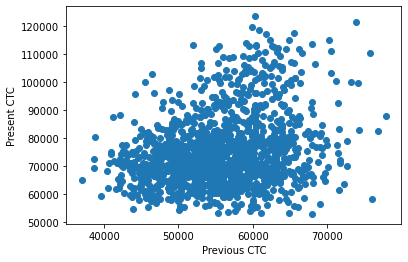

In [18]:
plt.scatter(data['Previous CTC'], data['CTC'])
plt.xlabel('Previous CTC')
plt.ylabel('Present CTC')

Text(0, 0.5, 'Present CTC')

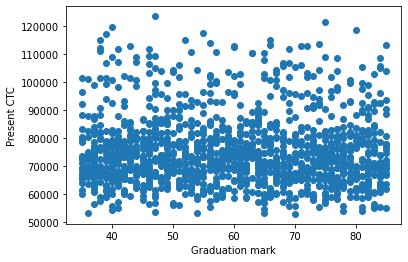

In [19]:
plt.scatter(data['Graduation marks'], data['CTC'])
plt.xlabel('Graduation mark')
plt.ylabel('Present CTC')

Text(0, 0.5, 'Present CTC')

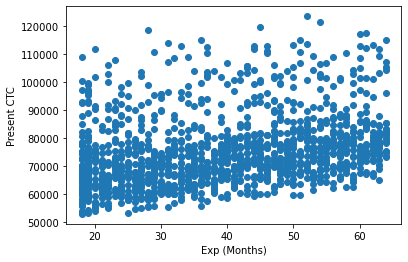

In [20]:
plt.scatter(data['Exp (Months)'], data['CTC'])
plt.xlabel('Exp (Months)')
plt.ylabel('Present CTC')

(array([ 43., 159., 258., 293., 234., 126.,  62.,  52.,  38.,  37.,  19.,
         13.,   4.]),
 array([ 53020.32      ,  58435.44846154,  63850.57692308,  69265.70538462,
         74680.83384615,  80095.96230769,  85511.09076923,  90926.21923077,
         96341.34769231, 101756.47615385, 107171.60461538, 112586.73307692,
        118001.86153846, 123416.99      ]),
 <BarContainer object of 13 artists>)

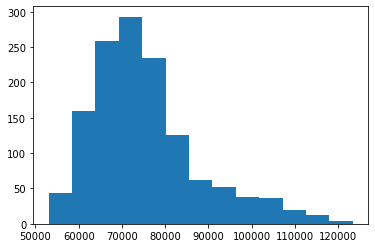

In [21]:
#check for outliers in CTC with the histogram

plt.hist(data['CTC'], bins = 13)

(array([  5.,  30.,  81., 139., 206., 249., 215., 180., 135.,  61.,  24.,
          9.,   4.]),
 array([36990.        , 40137.76923077, 43285.53846154, 46433.30769231,
        49581.07692308, 52728.84615385, 55876.61538462, 59024.38461538,
        62172.15384615, 65319.92307692, 68467.69230769, 71615.46153846,
        74763.23076923, 77911.        ]),
 <BarContainer object of 13 artists>)

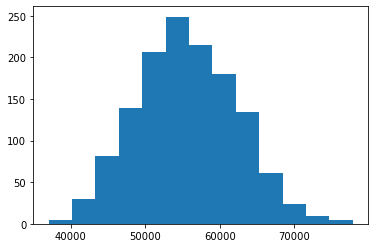

In [22]:
#check for outliers in the Previous CTC values with the histogram

plt.hist(data['Previous CTC'], bins = 13)

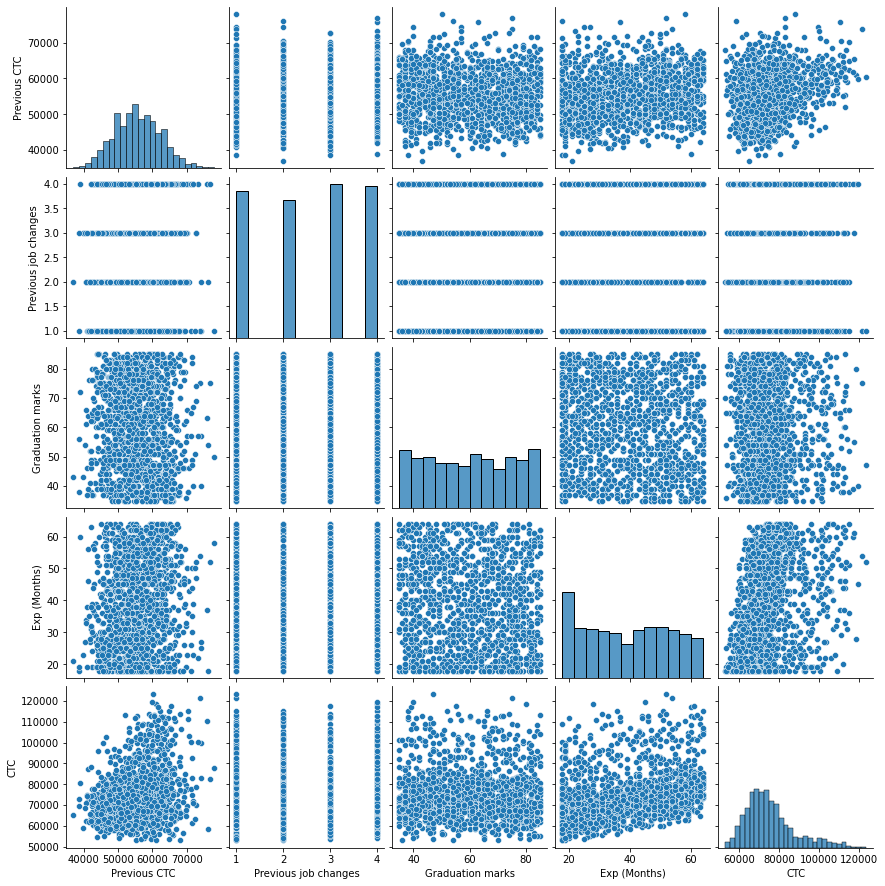

In [23]:
sns.pairplot(data)

<AxesSubplot:xlabel='College', ylabel='CTC'>

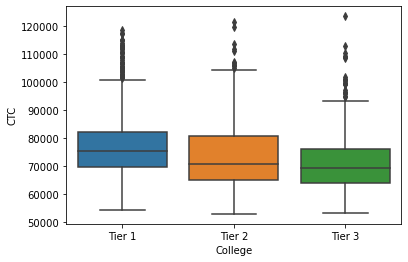

In [24]:
sns.boxplot(x= data.College, y = data.CTC)

<AxesSubplot:xlabel='Role', ylabel='CTC'>

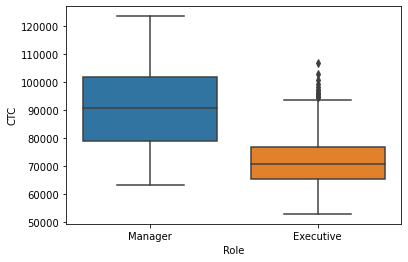

In [25]:
sns.boxplot(x = data.Role, y = data.CTC)

<AxesSubplot:xlabel='City type', ylabel='count'>

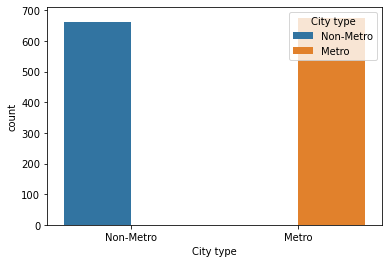

In [26]:
sns.countplot(x="City type", hue="City type", data=data)


<AxesSubplot:xlabel='College', ylabel='count'>

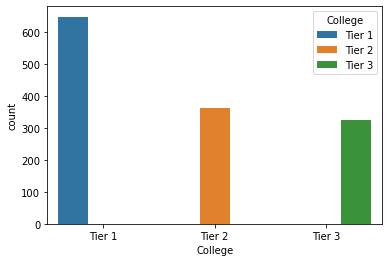

In [27]:
sns.countplot(x="College", hue="College", data=data)

<AxesSubplot:xlabel='Role', ylabel='count'>

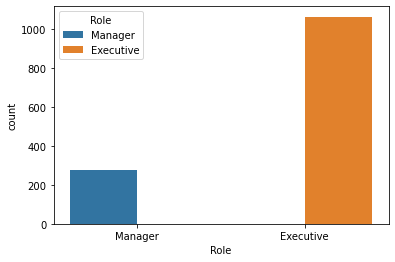

In [28]:
sns.countplot(x="Role", hue="Role", data=data)

### Feature Engineering

In [29]:
#change the column names of the test data to correlate with the training data

test.rename(columns ={'previous CTC':'Previous CTC', 'previous job changes': 'Previous job changes', 'Exp':'Exp (Months)'}, inplace = True)

In [34]:
#selected the needed column from the test data
test=test[['College','Role','City type','Previous CTC','Previous job changes','Graduation marks','Exp (Months)','Actual CTC']]
test.head(2)

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),Actual CTC
0,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.57653
1,Tier 2,Executive,Metro,57081,1,84,18,68005.87063


##### Changing Categorical data to Numerical

In [36]:
test = pd.get_dummies(test,drop_first=True)
test.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),Actual CTC,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,55523,3,66,19,71406.57653,0,0,1,1
1,57081,1,84,18,68005.87063,1,0,0,0
2,60347,2,52,28,76764.02028,1,0,0,0
3,49010,2,81,33,82092.38688,0,1,0,0
4,57879,4,74,32,73878.09773,0,1,0,0


In [31]:
data =pd.get_dummies(data, drop_first=True)

In [32]:
data.head(1)

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,55523.0,3,66,19,71406.58,0,0,1,1


In [79]:
#Normalise/scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [70]:
x_train = data.drop(['CTC'], axis = 1)
x_train.head(1)
x_train['Previous CTC'] = x_train['Previous CTC'].astype(int)

In [39]:
x_test = test.drop(['Actual CTC'], axis = 1)
x_test['Previous CTC'] = x_test['Previous CTC'].astype('float')
x_test.head(1)

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
0,55523.0,3,66,19,0,0,1,1


In [53]:
#scale the data using standard scaler
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.fit_transform(x_test)

In [41]:
y_train = data['CTC']
y_test =test['Actual CTC']

### Training the Machine Learning Model

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [54]:
reg.fit(X_train_scaled, y_train)

LinearRegression()

In [55]:
print(reg.intercept_)

75459.33903587444


In [80]:
print(reg.coef_)

[ 4.51593158e-01 -2.90411994e+01 -3.65235503e+00  2.58940642e+02
 -5.49200599e+03 -4.65973155e+03  1.93599437e+04 -4.08057730e+03]


#### Make Predictions

In [57]:
y_pred= reg.predict(X_test_scaled)

In [58]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,71406.57653,86123.937724
1,68005.87063,65789.546863
2,76764.02028,69941.690699
3,82092.38688,66843.038413
4,73878.09773,70556.761579
...,...,...
1333,69712.40366,76044.346272
1334,69298.75010,65742.551429
1335,66397.77069,64046.074943
1336,64044.38295,66223.222142


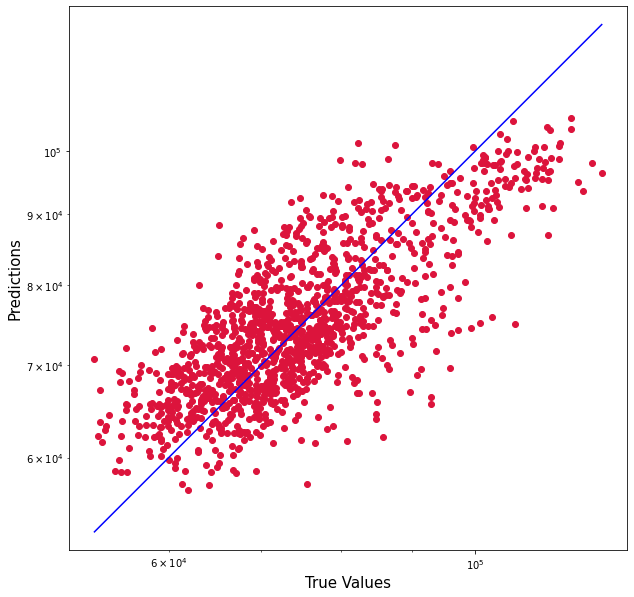

In [81]:
#plotting our prediction
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

### Model Evaluation

In [72]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 score: ",r2_score(y_test, y_pred))

Mean Absolute Error: 6159.175550813232
Mean Squared Error: 61677937.04476763
Root Mean Squared Error: 7853.530228169217
R2 score:  0.6081873160460819


In [60]:
acc_reg = round(reg.score(X_train_scaled, y_train)* 100,2)
acc_reg

60.82

In [82]:
#creating a dataframe for features and predicted values
final_df = pd.concat([test, pd.DataFrame(y_pred, columns=["Predicted CTC"])], axis=1)

In [85]:
final_df = final_df[['Previous CTC','Previous job changes','Graduation marks','Exp (Months)','College_Tier 2', 'College_Tier 3', 'Role_Manager','City type_Non-Metro','Actual CTC', 'Predicted CTC']]
final_df

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro,Actual CTC,Predicted CTC
0,55523,3,66,19,0,0,1,1,71406.57653,86123.937724
1,57081,1,84,18,1,0,0,0,68005.87063,65789.546863
2,60347,2,52,28,1,0,0,0,76764.02028,69941.690699
3,49010,2,81,33,0,1,0,0,82092.38688,66843.038413
4,57879,4,74,32,0,1,0,0,73878.09773,70556.761579
...,...,...,...,...,...,...,...,...,...,...
1333,59661,4,68,50,0,1,0,0,69712.40366,76044.346272
1334,53714,1,67,18,0,0,0,1,69298.75010,65742.551429
1335,61957,1,47,18,1,0,0,1,66397.77069,64046.074943
1336,53203,3,69,21,0,0,0,1,64044.38295,66223.222142
